In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

train: [0.511174216199277, tensor(0.5112, device='cuda:0')]
valid: [0.49438025734641333, tensor(0.4944, device='cuda:0')]
train: [0.47709822773340327, tensor(0.4771, device='cuda:0')]
valid: [0.35753762601601957, tensor(0.3575, device='cuda:0')]
train: [0.41266544778548664, tensor(0.4127, device='cuda:0')]
valid: [0.21704429087012705, tensor(0.2170, device='cuda:0')]
train: [0.27810228641946516, tensor(0.2781, device='cuda:0')]
valid: [0.8221983476118608, tensor(0.8222, device='cuda:0')]
train: [0.3509146087798313, tensor(0.3509, device='cuda:0')]
valid: [3.279030539772727, tensor(3.2790, device='cuda:0')]
train: [0.24750144920538908, tensor(0.2475, device='cuda:0')]
valid: [6.921502007378472, tensor(6.9215, device='cuda:0')]
train: [0.1916119779520367, tensor(0.1916, device='cuda:0')]
valid: [2.6574167579111427, tensor(2.6574, device='cuda:0')]
train: [0.19494822487902286, tensor(0.1949, device='cuda:0')]
valid: [0.9190263073853772, tensor(0.9190, device='cuda:0')]
train: [0.192351364

train: [0.03350481109239569, tensor(0.0335, device='cuda:0')]
valid: [0.037963281978260384, tensor(0.0380, device='cuda:0')]
train: [0.03346192421604745, tensor(0.0335, device='cuda:0')]
valid: [0.0374354160193241, tensor(0.0374, device='cuda:0')]
train: [0.03342452215318063, tensor(0.0334, device='cuda:0')]
valid: [0.03698285661562525, tensor(0.0370, device='cuda:0')]
train: [0.033386927932056026, tensor(0.0334, device='cuda:0')]
valid: [0.03654692389748313, tensor(0.0365, device='cuda:0')]
train: [0.033321506348415394, tensor(0.0333, device='cuda:0')]
valid: [0.0361415400649562, tensor(0.0361, device='cuda:0')]
train: [0.03326049017075876, tensor(0.0333, device='cuda:0')]
valid: [0.03587219209382028, tensor(0.0359, device='cuda:0')]
train: [0.03318519971857024, tensor(0.0332, device='cuda:0')]
valid: [0.0356572854398477, tensor(0.0357, device='cuda:0')]
train: [0.033047612033673186, tensor(0.0330, device='cuda:0')]
valid: [0.03543800055378615, tensor(0.0354, device='cuda:0')]
train: 

train: [0.032036743353848436, tensor(0.0320, device='cuda:0')]
valid: [0.03437002740725122, tensor(0.0344, device='cuda:0')]
train: [0.03200555678030745, tensor(0.0320, device='cuda:0')]
valid: [0.034296416273020734, tensor(0.0343, device='cuda:0')]
train: [0.03204721479273554, tensor(0.0320, device='cuda:0')]
valid: [0.034307788116763334, tensor(0.0343, device='cuda:0')]
train: [0.03198449054167638, tensor(0.0320, device='cuda:0')]
valid: [0.034327786378186155, tensor(0.0343, device='cuda:0')]
train: [0.031990032290937886, tensor(0.0320, device='cuda:0')]
valid: [0.034248840929281835, tensor(0.0342, device='cuda:0')]
train: [0.03199971137355216, tensor(0.0320, device='cuda:0')]
valid: [0.03424220855789955, tensor(0.0342, device='cuda:0')]
train: [0.0319499566187313, tensor(0.0319, device='cuda:0')]
valid: [0.034251123967796865, tensor(0.0343, device='cuda:0')]
train: [0.031961063840496004, tensor(0.0320, device='cuda:0')]
valid: [0.03419299318332865, tensor(0.0342, device='cuda:0')]
t

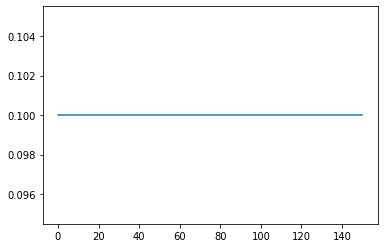

In [3]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer

conf = parameters()
conf.tree_depth = 14
conf.use_prenet = True
conf.epochs = 150

x,y = step_gen(range = (0,60),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs)
run.fit(conf.epochs, learn)

run.recorder.plot_lr()

# from training import trainer
# train = trainer(xt,yt)

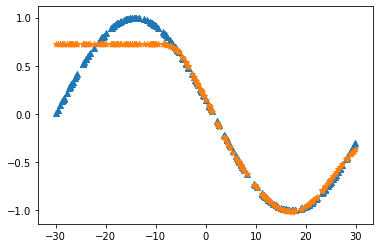

In [4]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

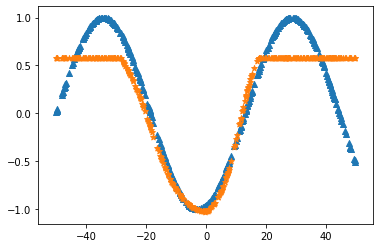

In [29]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()